In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib 
import math
from matplotlib.ticker import FuncFormatter
from scipy import stats
'''
192.168.0.24: intensity context (old task), duration context (new task)
192.168.0.29: click rate task (old task), sweep direction (new task)
'''

'\n192.168.0.24: intensity context (old task), duration context (new task)\n192.168.0.29: click rate task (old task), sweep direction (new task)\n'

In [3]:
'''
For the intensity vs. click rate task, first few CLIK trials were corrupted, drop them
'''
ALL = pd.read_csv("../Mante/ALL_6.20.25.csv").iloc[:,1:]
ALL = ALL.dropna()
subject_IDs = np.sort(ALL.subjects.unique())
# find the two tasks
INTENSITY = ALL[ALL.task == 24].reset_index(drop=True)
CLICKS = ALL[ALL.task == 29].reset_index(drop=True)

# Filter out the contaminated trials (approx. 500 trials)
# INTENSITY = INTENSITY[500:]
CLICKS = CLICKS[500:]
ALL = pd.concat([INTENSITY, CLICKS]).reset_index(drop=True)

# load context-dependent and invariant trials for each task
INVARIANT_INTENSITY = INTENSITY[
    (INTENSITY['specific_stims'] == 'clicks_12hz_1s_60db.wav')
    | 
    (INTENSITY['specific_stims'] == 'clicks_32hz_1s_70db.wav')
]
DEPENDENT_INTENSITY = INTENSITY[
    (INTENSITY['specific_stims'] == 'clicks_12hz_1s_70db.wav')
    | 
    (INTENSITY['specific_stims'] == 'clicks_32hz_1s_60db.wav')
]

INVARIANT_CLICKS = CLICKS[
    (CLICKS['specific_stims'] == 'clicks_12hz_1s_60db.wav')
    | 
    (CLICKS['specific_stims'] == 'clicks_32hz_1s_70db.wav')
]
DEPENDENT_CLICKS = CLICKS[
    (CLICKS['specific_stims'] == 'clicks_12hz_1s_70db.wav')
    | 
    (CLICKS['specific_stims'] == 'clicks_32hz_1s_60db.wav')
]

In [ ]:
colors = ['#FFC07F', # Arena A
          '#94c47d', #  Arena B
          '#4AA9FC', # context-dep
          "#A1A7B0"] # context-inv

# Plot animal 41 for Grant

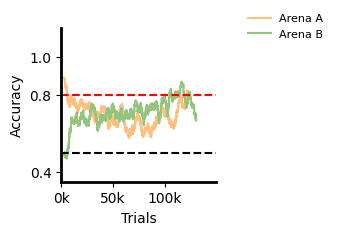

In [5]:
# plot the overall performance in both tasks
roll_size = 300
matplotlib.rcParams['font.size'] = 10

subject = subject_IDs[0]
colors = ['#FFC07F', # Arena A
          '#94c47d', #  Arena B
          '#4AA9FC', # context-dep
          "#A1A7B0"] # context-inv

# overall performance
fig = plt.figure(figsize=(2,2))
ax = plt.subplot(1,1,1)
sub_intensity = INTENSITY.loc[INTENSITY.subjects == subject].reset_index(drop=True)
sub_intensity.outcomes.rolling(roll_size).mean().plot(ax=ax,label="Arena A", color=colors[0])
sub_clicks = CLICKS.loc[CLICKS.subjects == subject].reset_index(drop=True)
sub_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="Arena B", color=colors[1])
ax.axhline(0.8, color='red', ls='--')
ax.axhline(0.5, color='black', ls='--')
x_max = max(len(sub_intensity), len(sub_clicks))
if x_max < 15000:
    lim_x = 15000
else:
    lim_x = math.ceil(x_max / 5000) * 5000
ax.set_xlim(0, lim_x) 
ax.set_xticks(np.arange(0, lim_x+1, 5000))
ax.set_xlabel('Trials')
# ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
last_tick  = ax.xaxis.get_major_ticks()[-1]   # grab final Tick object
last_tick.set_visible(False)
ax.set_ylim(0.35, 1.15)  
ax.set_ylabel("Accuracy")
ax.set_yticks(np.arange(0.4, 1.1, 0.2))

ax.yaxis.get_major_ticks()[1].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper left',    # position above all subplots
    ncol=1,                # number of columns in the legend
    bbox_to_anchor=(1.01, 1),
    fontsize = 8,
    frameon = False
)
# plt.savefig('overall_performance.pdf',bbox_inches='tight')
plt.show()


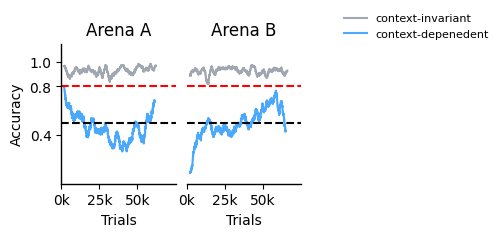

In [6]:
''' 
Plot context-dep or inv stimuli accuracy separately
'''
roll_size = 200
# Task intensity
fig = plt.figure(figsize=(3,2))

ax = plt.subplot(1, 2, 1)
sub_inv_intensity = INVARIANT_INTENSITY.loc[INVARIANT_INTENSITY.subjects == subject].reset_index(drop=True)
sub_inv_intensity.outcomes.rolling(roll_size,).mean().plot(ax=ax,label="Invariant", color=colors[3])
sub_dep_intensity = DEPENDENT_INTENSITY.loc[DEPENDENT_INTENSITY.subjects == subject].reset_index(drop=True)
sub_dep_intensity.outcomes.rolling(roll_size).mean().plot(ax=ax,label="Dependent", color=colors[2])
ax.axhline(0.8, color='red', ls='--')
ax.axhline(0.5, color='black', ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
x_max = max(len(sub_inv_intensity), len(sub_dep_intensity))
if x_max < 5500:
    lim_x = 5500
else:
    lim_x = math.ceil(x_max / 2500) * 2500
ax.set_xlim(0, lim_x) 
ax.set_xticks(np.arange(0, lim_x+1, 2500))
# ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
last_tick  = ax.xaxis.get_major_ticks()[-1]   # grab final Tick object
last_tick.set_visible(False)
ax.set_ylim(0, 1.15)  
ax.set_yticks(np.arange(0, 1.1, 0.2))

ax.yaxis.get_major_ticks()[0].set_visible(False)
ax.yaxis.get_major_ticks()[1].set_visible(False)
ax.yaxis.get_major_ticks()[3].set_visible(False)

plt.title(f'Arena A')
ax.set_xlabel('Trials')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Trials')

ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Task click
ax = plt.subplot(1, 2, 2)
sub_inv_clicks = INVARIANT_CLICKS.loc[INVARIANT_CLICKS.subjects == subject].reset_index(drop=True)
sub_inv_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="context-invariant", color=colors[3])
sub_dep_clicks = DEPENDENT_CLICKS.loc[DEPENDENT_CLICKS.subjects == subject].reset_index(drop=True)
sub_dep_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="context-depenedent", color=colors[2])
ax.axhline(0.8, color='red', ls='--')
ax.axhline(0.5, color='black', ls='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
x_max = max(len(sub_inv_clicks), len(sub_dep_clicks))
if x_max < 5000:
    lim_x = 5000
else:
    lim_x = math.ceil(x_max / 2500) * 2500
ax.set_xlim(0, lim_x) 
ax.set_xticks(np.arange(0, lim_x+1, 2500))
# ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
last_tick  = ax.xaxis.get_major_ticks()[-1]   # grab final Tick object
last_tick.set_visible(False)
ax.set_xlabel('Trials')
plt.title(f'Arena B')
ax.set_ylim(0, 1.15)  
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(
    hspace=0.5,    # increase vertical padding between rows
    wspace=0.1,    # horizontal padding (if multiple columns)
    top=0.8,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)
handles, labels = ax.get_legend_handles_labels()
# add a single legend for the whole figure
fig.legend(
    handles,
    labels,
    loc='upper left',    # position above all subplots
    ncol=1,                # number of columns in the legend
    bbox_to_anchor=(1.01, 1),
    fontsize = 8,
    frameon = False,
)
# plt.savefig('stim_specific_performance.pdf',bbox_inches='tight')
plt.show()


In [7]:
subject_data = ALL.loc[ALL.subjects == subject].reset_index(drop=True)
subject_data = subject_data.sort_values("times").reset_index(drop=True)
subject_data["trial_idx"] = subject_data.index

# (a) contiguous-block labels
subject_data['block_id'] = subject_data['task'].ne(
    subject_data['task'].shift()
).cumsum()

# (b) trial index *within* each block
subject_data['within_block_idx'] = (
    subject_data
      .groupby('block_id')
      .cumcount()
)

# (c) block length for every trial 
block_len = (
    subject_data.groupby('block_id')
    .size()
    .rename('block_len')
)
subject_data = subject_data.join(block_len, on='block_id')


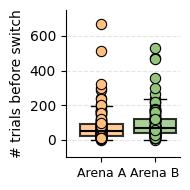

In [8]:
# Box plot — block length by task
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

palette = {24: colors[0], 29: colors[1]} 

block_len_df = (
    subject_data[['task', 'block_id', 'block_len']]
      .drop_duplicates()
      .reset_index(drop=True)
)

Intensity_len = block_len_df.loc[block_len_df['task'] == 24, 'block_len']
Cr_len = block_len_df.loc[block_len_df['task'] == 29, 'block_len']
data = [Intensity_len, Cr_len]

bp = ax.boxplot(
    data,
    patch_artist=True,
    widths=0.6,
    positions=[1.0, 1.75],
    boxprops    = dict(edgecolor='black',linewidth = 1.5),
    medianprops = dict(color='black', linewidth=1.5),
    whiskerprops= dict(color='black'),
    capprops    = dict(color='black')
)

box_colors = [palette[24], palette[29]]
for box, col in zip(bp['boxes'], box_colors):
    box.set_facecolor(col)
    box.set_alpha(0.8) 

rng      = np.random.default_rng(1)
jitter   = 0
dot_area = 55

# Intensity dots (blue)
x24 = 1 + rng.uniform(-jitter, jitter, len(Intensity_len))
ax.scatter(
    x24, Intensity_len,
    marker='o',
    s=dot_area,
    facecolors=palette[24],   # your blue
    edgecolors='black',
    linewidths=0.8,
    zorder=2
)

# CR dots (orange)
x29 = 1.75 + rng.uniform(-jitter, jitter, len(Cr_len))
ax.scatter(
    x29, Cr_len,
    marker='o',
    s=dot_area,
    facecolors=palette[29],   # your orange
    edgecolors='black',
    linewidths=0.8,
    zorder=2
)

ax.set_ylim([-100,750])
ax.set_xlim([0.5, 2.1])
ax.set_xticklabels(['Arena A', 'Arena B'], fontsize = 9)
ax.set_ylabel('# trials before switch')
ax.grid(axis='y', linestyle='--', alpha=0.35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
# plt.savefig('switch_frequency.pdf',bbox_inches='tight')
plt.show()

In [10]:
t_stat, p_val = stats.ttest_ind(Intensity_len, Cr_len, equal_var=False)  # Welch’s t-test
if p_val > 0.05:
    print(f'Subject stays in either arena does not significantly differ: t = {t_stat:.3f},  p = {p_val:.4f}')
Intensity_len_mean = np.mean(Intensity_len)
Intensity_len_se = Intensity_len.std(ddof=1) / np.sqrt(len(Intensity_len))
Cr_len_mean = np.mean(Cr_len)
Cr_len_se = Cr_len.std(ddof=1) / np.sqrt(len(Cr_len))
print(f'Intensity task on average runs for {Intensity_len_mean} trials +- {Intensity_len_se:.2f}')
print(f'Click Rate task on average runs for {Cr_len_mean} trials +- {Cr_len_se:.2f}')

Subject stays in either arena does not significantly differ: t = -0.352,  p = 0.7255
Intensity task on average runs for 87.39716312056737 trials +- 12.81
Click Rate task on average runs for 92.56737588652483 trials +- 7.23


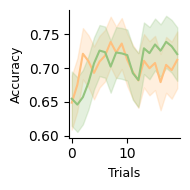

In [18]:
max_k = 20                                      # how many trials to keep

trimmed = subject_data[subject_data['within_block_idx'] < max_k].copy()

summ = (
    trimmed
      .groupby(['task', 'within_block_idx'])['outcomes']
      .agg(mean='mean', count='count', std='std')
      .reset_index()
)
summ['sem'] = summ['std'] / np.sqrt(summ['count'])

#smoothing
for col in ['mean', 'sem']:
    summ[f'smooth_{col}'] = (
        summ
          .groupby('task')[col]
          .transform(lambda s: s.rolling(3,
                                         center=True,
                                         min_periods=1).mean())
    )

fig, ax = plt.subplots(figsize=(2, 2))

for task_val in (24, 29):
    g  = summ[summ['task'] == task_val]
    x  = g['within_block_idx']
    m  = g['smooth_mean']
    se = g['smooth_sem']
    cur_label = 'Arena A' if task_val == 24 else 'Arena B'
    ax.plot(x, m, color=palette[task_val], label=cur_label)
    ax.fill_between(x, m - se, m + se,
                    color=palette[task_val], alpha=0.25)


# ax.axhline(0.8, color='red', ls='--')
# ax.axhline(0.5, color='black', ls='--')
ax.set_xlim(-0.5, max_k - 0.5)
ax.set_xlabel('Trials', fontsize = 9)
ax.set_ylabel('Accuracy',fontsize = 9)
# ax.set_ylim(0.55, 0.85)  
# ax.set_yticks(np.arange(0.6, 0.8, 0.05))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
# plt.savefig('after_switch_accuray.pdf',bbox_inches='tight')
plt.show()